<a href="https://colab.research.google.com/github/Indrayani0/CVIP/blob/main/EDA_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/globalterrorism.csv", encoding="latin1")
df=pd.DataFrame(data)
print("data imported successfully...")

<ipython-input-2-608cccb872b0>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/globalterrorism.csv", encoding="latin1")


data imported successfully...


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in df.columns:
  print(i, end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

**Clean** **Data**

In [8]:
df=df[["iyear", "imonth", "iday", "country_txt", "region_txt", "provstate", "city", "latitude", "longitude", "location", "summary", "attacktype1_txt", "targtype1_txt", "gname", "motive", "weaptype1_txt", "nkill", "nwound", "addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.rename(columns={"iyear":"Year", "imonth": "Month", "iday": "Day", "country_txt": "Country", "region_txt": "Region", "provstate": "State", "city":"City", "latitude":"Latitude", "longitude":"Longitude", "location":"Location", "summary":"Summary", "attacktype1_txt": "Attack type", "targtype1_txt":"Target Type", "gname": "Group name", "motive":"Motive", "weaptype1_txt": "Weapon type", "nkill":"Killed", "nwound": "Wounded", "addnotes":"Add notes"}, inplace=True)

In [10]:
df.head()

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Location,Summary,Attack type,Target Type,Group name,Motive,Weapon type,Killed,Wounded,Add notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Location     55495 non-null   object 
 10  Summary      115562 non-null  object 
 11  Attack type  181691 non-null  object 
 12  Target Type  181691 non-null  object 
 13  Group name   181691 non-null  object 
 14  Motive       50561 non-null   object 
 15  Weapon type  181691 non-null  object 
 16  Killed       171378 non-null  float64
 17  Wounded      165380 non-null  float64
 18  Add notes    28289 non-n

In [12]:
df.shape

(181691, 19)

In [13]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
City              434
Latitude         4556
Longitude        4557
Location       126196
Summary         66129
Attack type         0
Target Type         0
Group name          0
Motive         131130
Weapon type         0
Killed          10313
Wounded         16311
Add notes      153402
dtype: int64

In [14]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)

In [15]:
df["Casualty"]=df["Killed"]+df["Wounded"]

In [16]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# *Year* *wise* *analysis*

In [17]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year", "Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


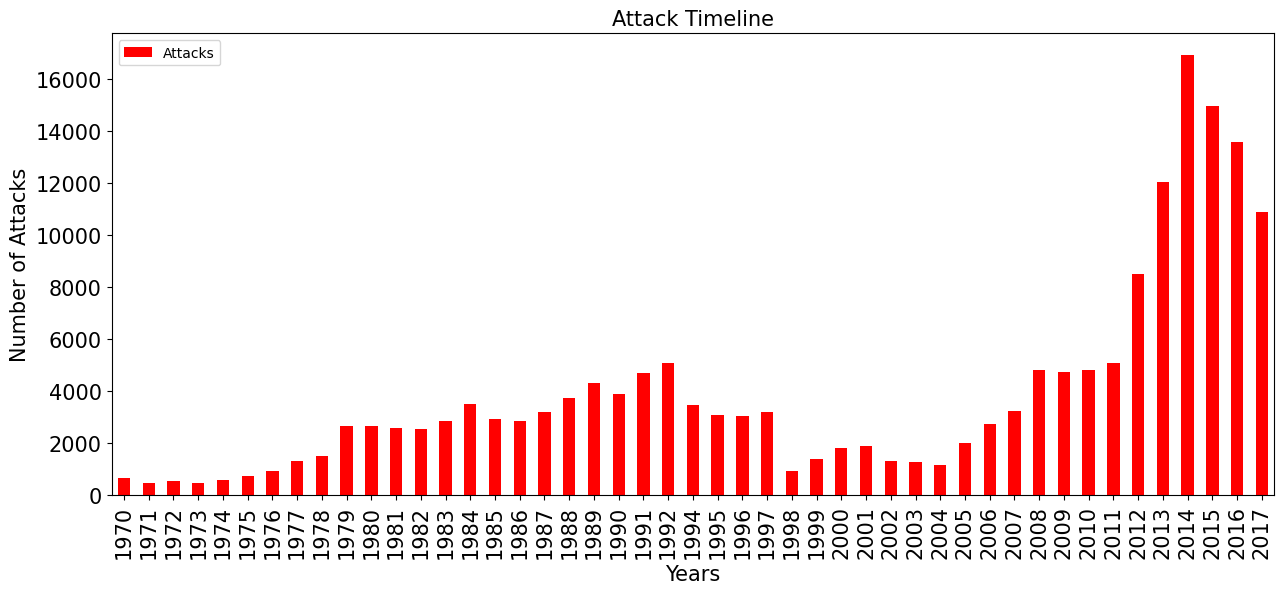

In [18]:
attacks.plot(kind="bar", color="red", figsize=(15,6), fontsize=15)
plt.title("Attack Timeline", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [19]:
yCas=df[["Year", "Casualty"]].groupby("Year").sum()
yCas.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


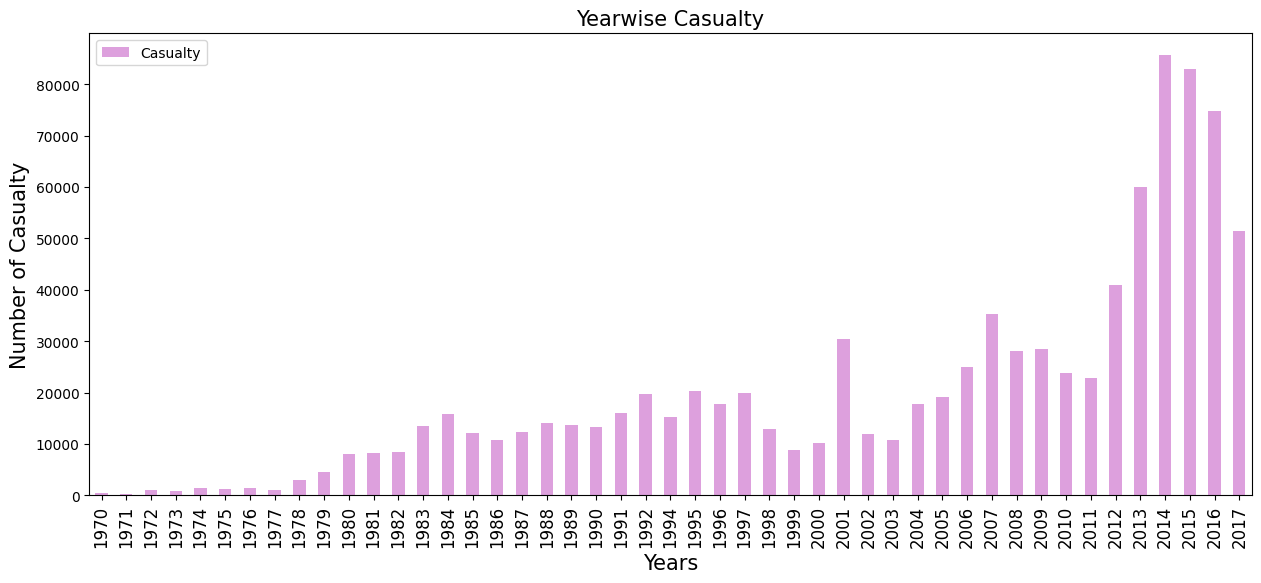

In [20]:
yCas.plot(kind="bar", color="plum", figsize=(15,6))
plt.title("Yearwise Casualty", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualty",fontsize=15)
plt.show()

In [21]:
yKil=df[["Year", "Killed"]].groupby("Year").sum()
yKil.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [22]:
yWon=df[["Year", "Wounded"]].groupby("Year").sum()
yWon.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


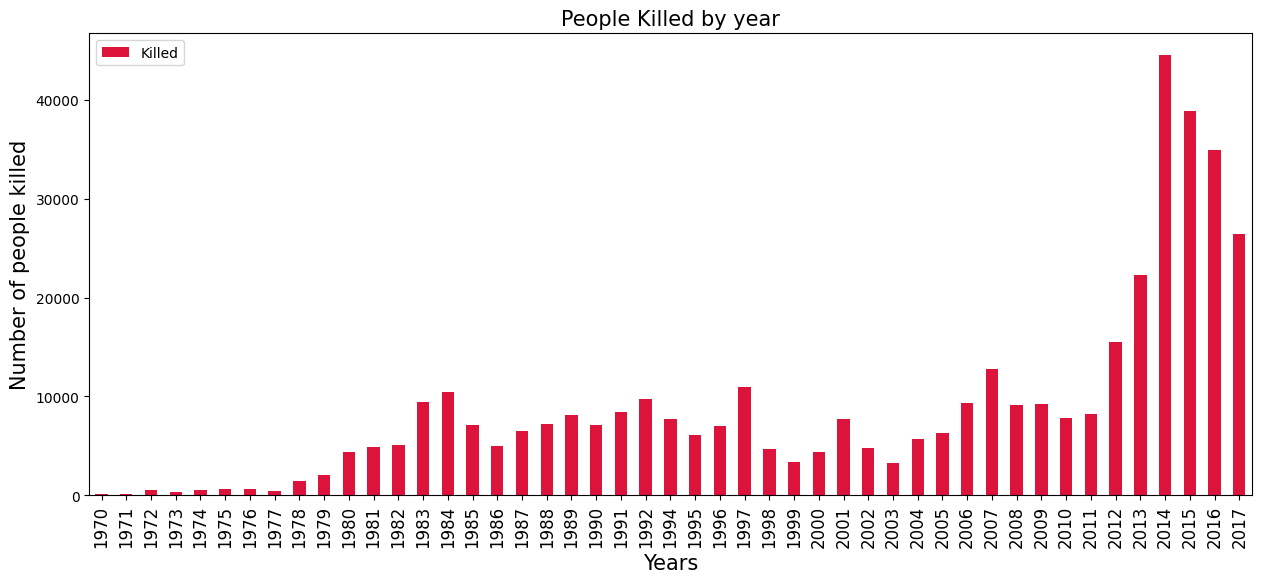

In [23]:
yKil.plot(kind="bar", color="crimson", figsize=(15,6))
plt.title("People Killed by year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of people killed",fontsize=15)
plt.show()

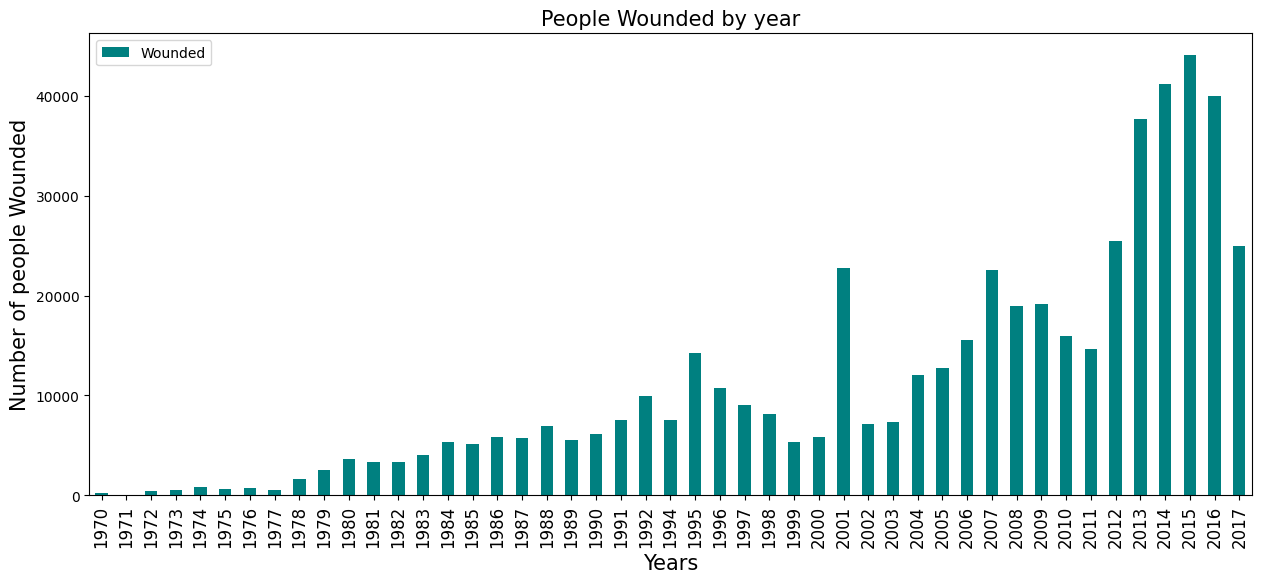

In [24]:
yWon.plot(kind="bar", color="teal", figsize=(15,6))
plt.title("People Wounded by year", fontsize=15)
plt.xlabel("Years", fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel("Number of people Wounded",fontsize=15)
plt.show()

# *Region* *wise* *analysis*

In [25]:
regionW=pd.crosstab(df.Year, df.Region)
regionW.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


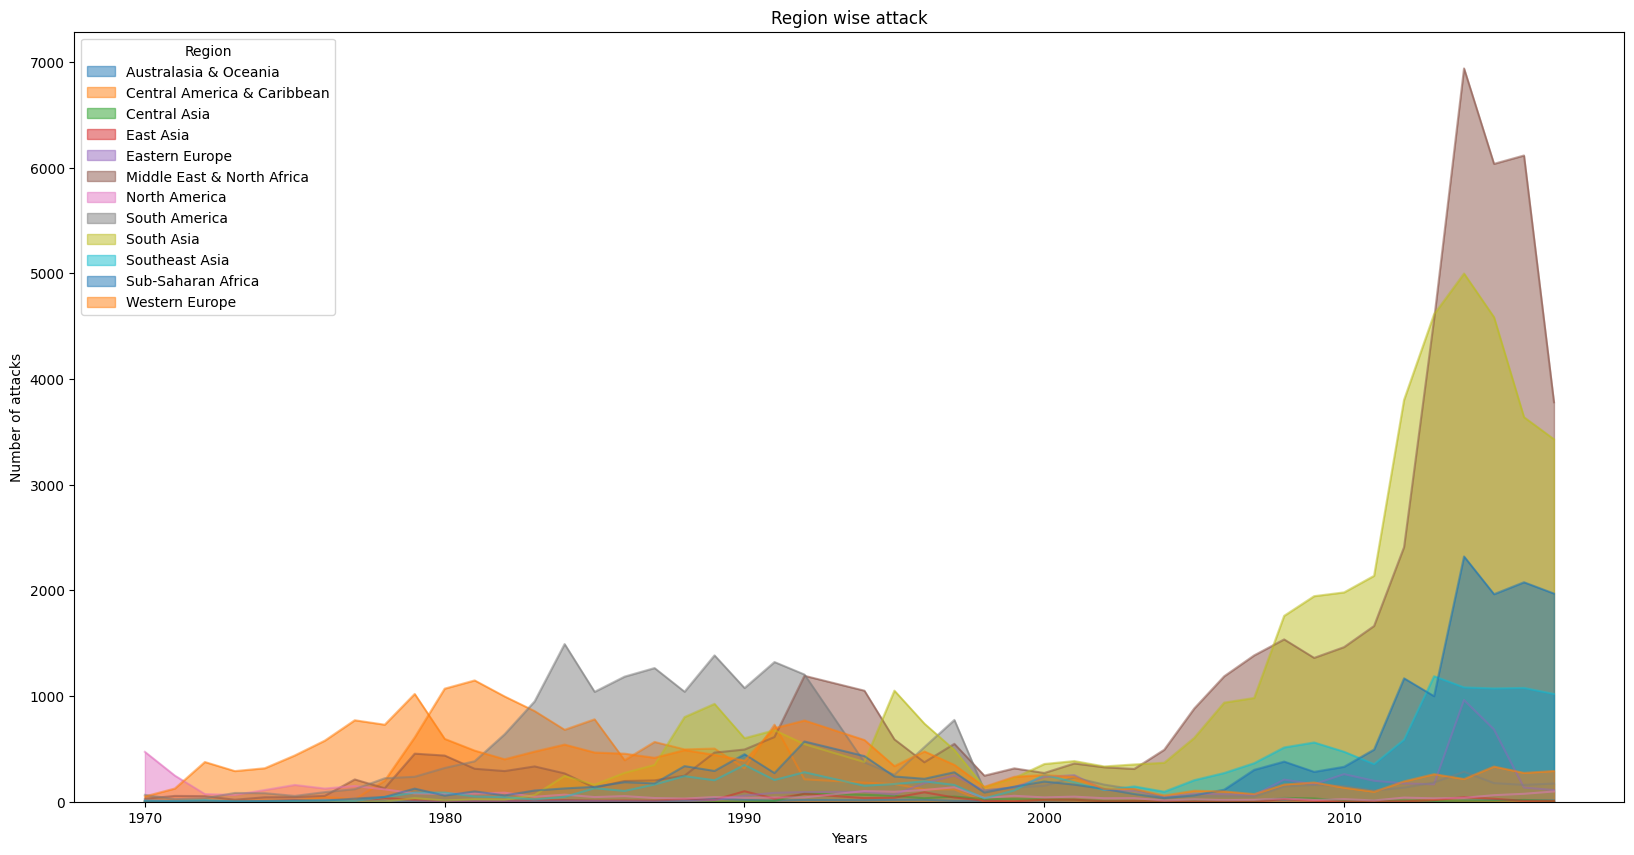

In [26]:
regionW.plot(kind="area", stacked=False, alpha=0.5, figsize=(20,10))
plt.title("Region wise attack")
plt.xlabel("Years")
plt.ylabel("Number of attacks")
plt.show()

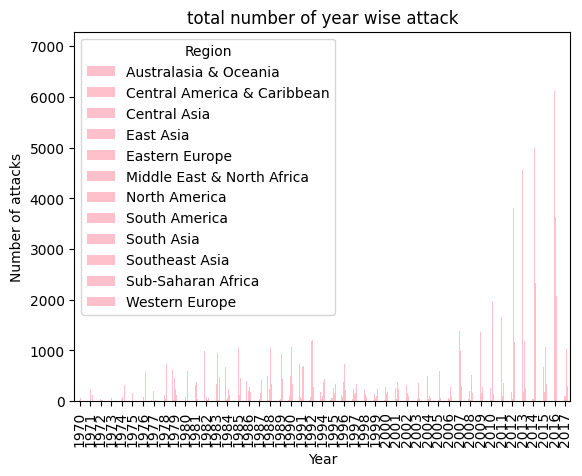

In [27]:
regionW.plot(kind="bar", color="pink")
plt.title("total number of year wise attack")
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.show()

In [28]:
regt=regionW.transpose()
regt["Total"]=regt.sum(axis=1)
rt=regt["Total"].sort_values(ascending=False)
rt

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Total, dtype: int64

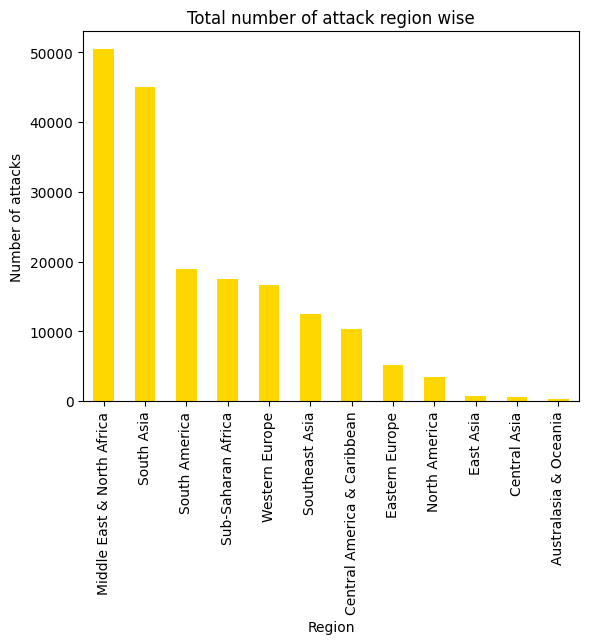

In [29]:
rt.plot(kind="bar", color="gold")
plt.title("Total number of attack region wise")
plt.xlabel("Region")
plt.ylabel("Number of attacks")
plt.show()

In [30]:
rCas=df[["Region", "Casualty"]].groupby("Region").sum().sort_values(by="Casualty", ascending=False)
rCas

,Casualty
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


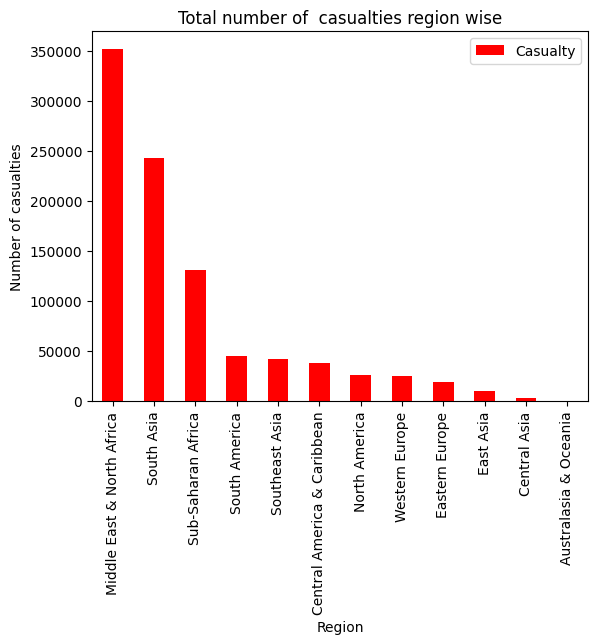

In [31]:
rCas.plot(kind="bar", color="red")
plt.title("Total number of  casualties region wise")
plt.xlabel("Region")
plt.ylabel("Number of casualties")
plt.show()

In [32]:
rKil=df[["Region", "Killed"]].groupby("Region").sum().sort_values(by="Killed", ascending=False)
rKil

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


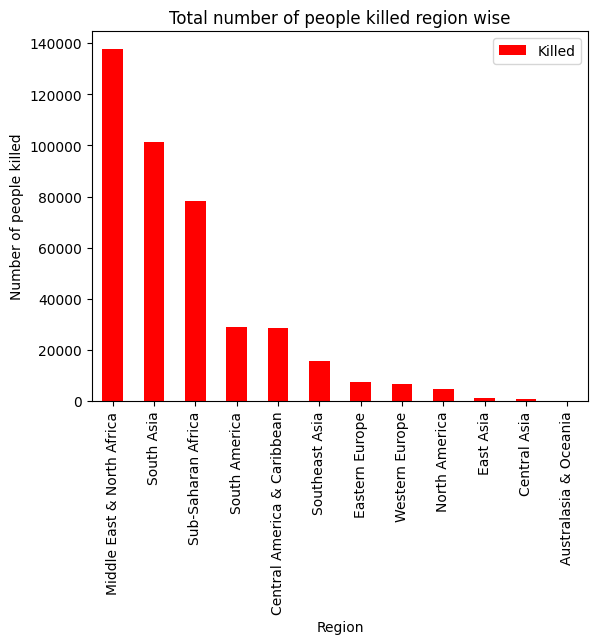

In [33]:
rKil.plot(kind="bar", color="red")
plt.title("Total number of people killed region wise")
plt.xlabel("Region")
plt.ylabel("Number of people killed")
plt.show()

In [34]:
rWon=df[["Region", "Wounded"]].groupby("Region").sum().sort_values(by="Wounded", ascending=False)
rWon

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


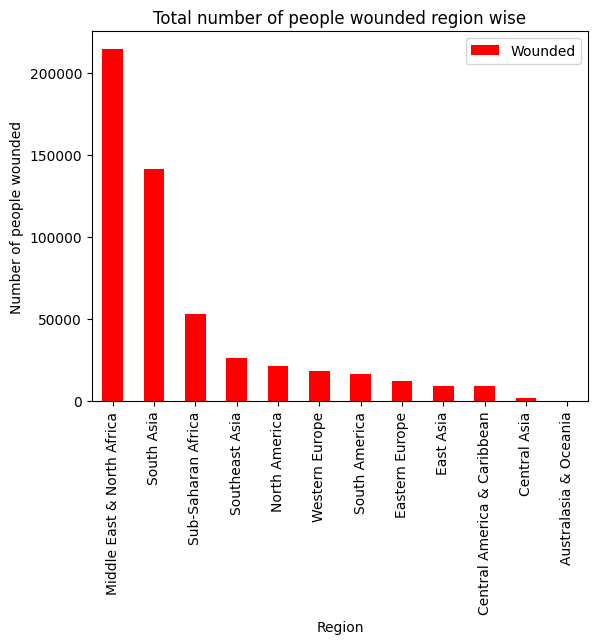

In [35]:
rWon.plot(kind="bar", color="red")
plt.title("Total number of people wounded region wise")
plt.xlabel("Region")
plt.ylabel("Number of people wounded")
plt.show()

# *Country* *wise* *analysis*



In [36]:
ct=df["Country"].value_counts().head(10)
ct

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

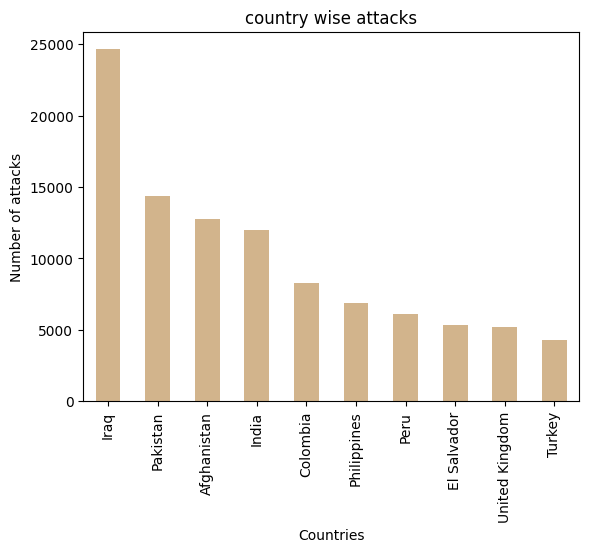

In [37]:
ct.plot(kind="bar", color="tan")
plt.title("country wise attacks")
plt.xlabel("Countries")
plt.ylabel("Number of attacks")
plt.show()

In [38]:
cCas=df[["Country", "Casualty"]].groupby("Country").sum().sort_values(by="Casualty", ascending=False)
cCas

,Casualty
Country,
Iraq,213279.0
Afghanistan,83661.0
Pakistan,65860.0
India,48321.0
Nigeria,32921.0
...,...
Wallis and Futuna,0.0
Falkland Islands,0.0
Andorra,0.0


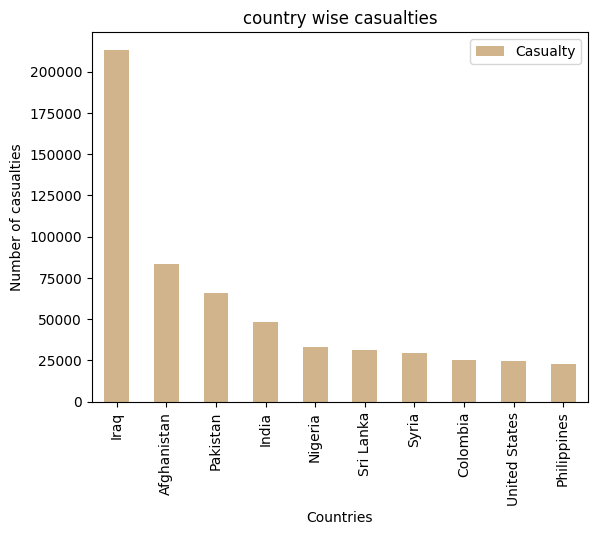

In [39]:
cCas[:10].plot(kind="bar", color="tan")
plt.title("country wise casualties")
plt.xlabel("Countries")
plt.ylabel("Number of casualties")
plt.show()

In [40]:
cKil=df[["Country", "Killed"]].groupby("Country").sum().sort_values(by="Killed", ascending=False)
cKil

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
...,...
St. Kitts and Nevis,0.0
Martinique,0.0
Brunei,0.0


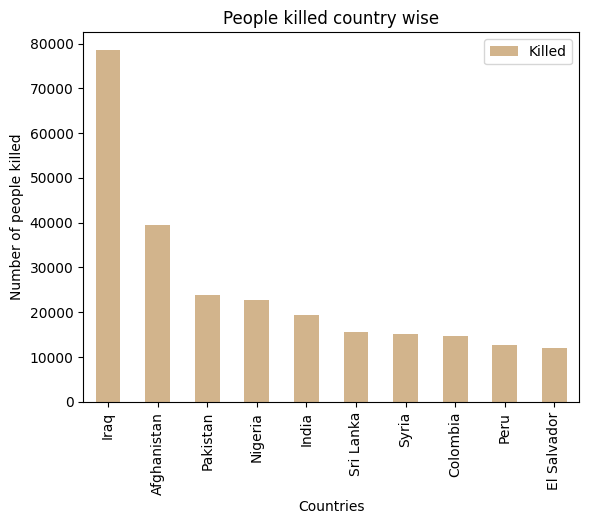

In [41]:
cKil[:10].plot(kind="bar", color="tan")
plt.title("People killed country wise")
plt.xlabel("Countries")
plt.ylabel("Number of people killed")
plt.show()

In [42]:
cWon=df[["Country", "Wounded"]].groupby("Country").sum().sort_values(by="Wounded", ascending=False)
cWon

,Wounded
Country,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
...,...
Bahamas,0.0
South Vietnam,0.0
Montenegro,0.0


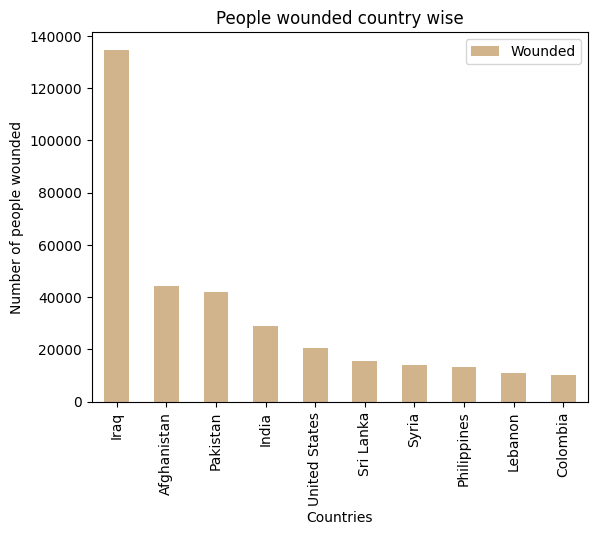

In [43]:
cWon[:10].plot(kind="bar", color="tan")
plt.title("People wounded country wise")
plt.xlabel("Countries")
plt.ylabel("Number of people wounded")
plt.show()

# *City* *wise* *analysis*

In [44]:
city=df["City"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

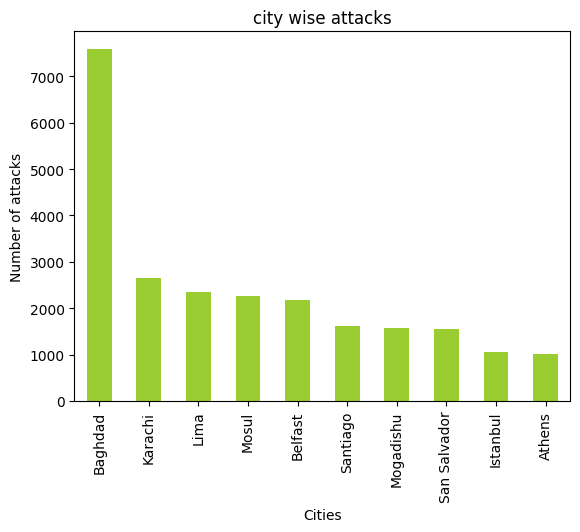

In [45]:
city.plot(kind="bar", color="yellowgreen")
plt.title("city wise attacks")
plt.xlabel("Cities")
plt.ylabel("Number of attacks")
plt.show()

In [46]:
cityCas=df[["City", "Casualty"]].groupby("City").sum().sort_values(by="Casualty", ascending=False)
cityCas

,Casualty
City,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
...,...
Divandarreh,0.0
Diva,0.0
Padaiya,0.0


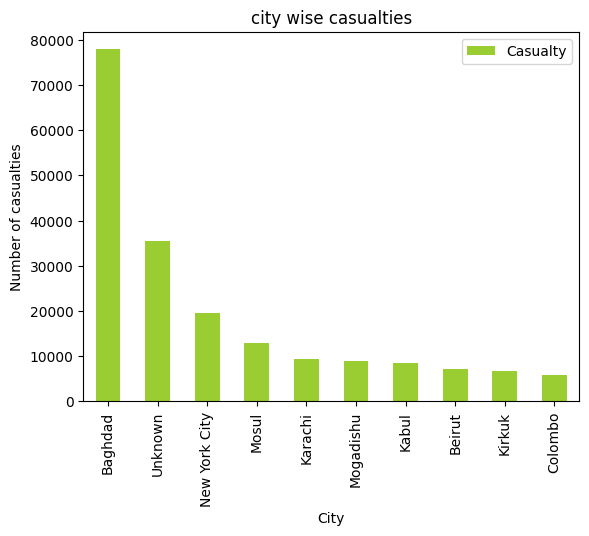

In [47]:
cityCas[:10].plot(kind="bar", color="yellowgreen")
plt.title("city wise casualties")
plt.xlabel("City")
plt.ylabel("Number of casualties")
plt.show()

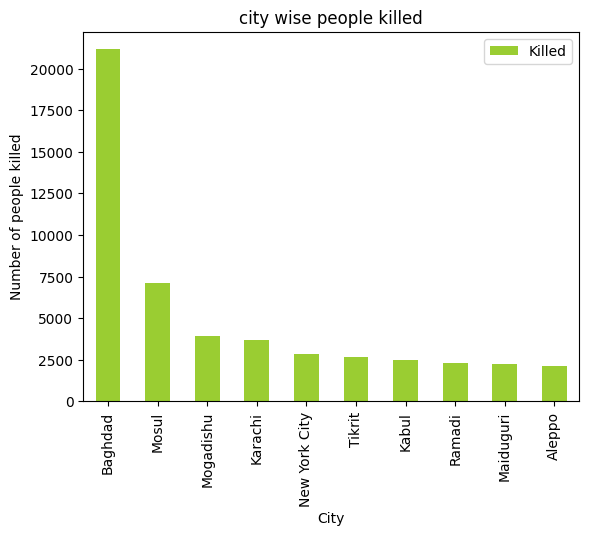

In [48]:
cityKil=df[["City", "Killed"]].groupby("City").sum().sort_values(by="Killed", ascending=False)
cityKil
cityKil[1:11].plot(kind="bar", color="yellowgreen")
plt.title("city wise people killed")
plt.xlabel("City")
plt.ylabel("Number of people killed")
plt.show()

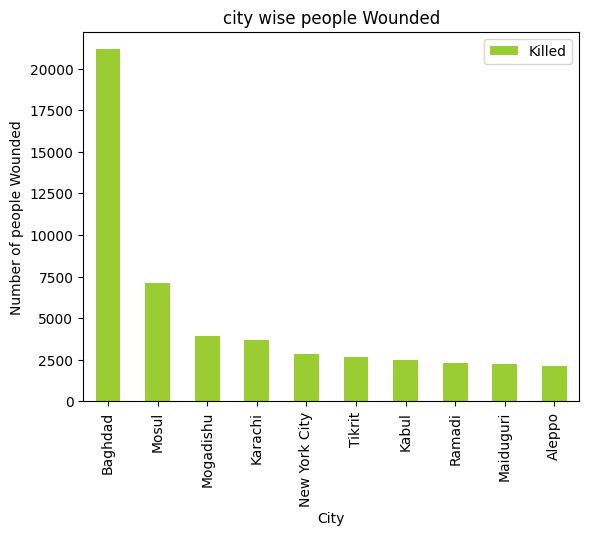

In [49]:
cityWon=df[["City", "Wounded"]].groupby("City").sum().sort_values(by="Wounded", ascending=False)
cityWon
cityKil[1:11].plot(kind="bar", color="yellowgreen")
plt.title("city wise people Wounded")
plt.xlabel("City")
plt.ylabel("Number of people Wounded")
plt.show()

In [50]:
group=df["Group name"].value_counts()[1:11]
group

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group name, dtype: int64

Text(0.5, 1.0, 'Name of different groups')

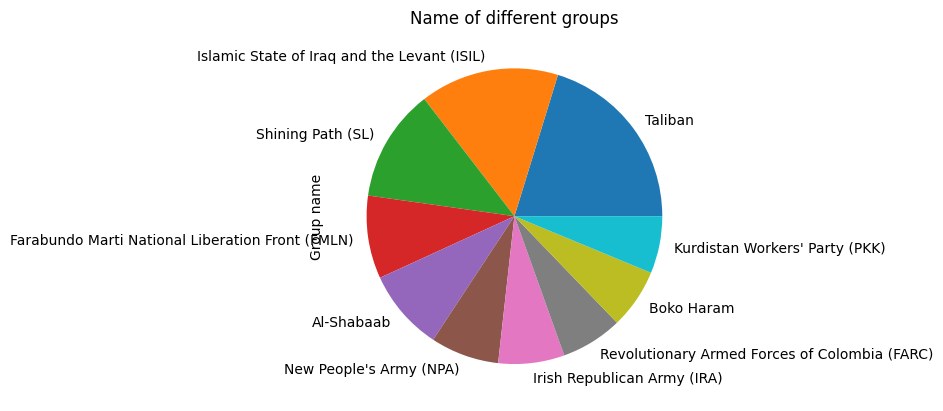

In [51]:
group.plot(kind="pie")
plt.title("Name of different groups")

In [52]:
groupCas=df[["Group name", "Casualty"]].groupby("Group name").sum().sort_values(by="Casualty", ascending=False)[1:11]
groupCas

,Casualty
Group name,
Islamic State of Iraq and the Levant (ISIL),69595.0
Taliban,57342.0
Boko Haram,29801.0
Al-Qaida,28372.0
Liberation Tigers of Tamil Eelam (LTTE),22020.0
Al-Shabaab,16954.0
Tehrik-i-Taliban Pakistan (TTP),15574.0
Al-Qaida in Iraq,14724.0
Shining Path (SL),14632.0


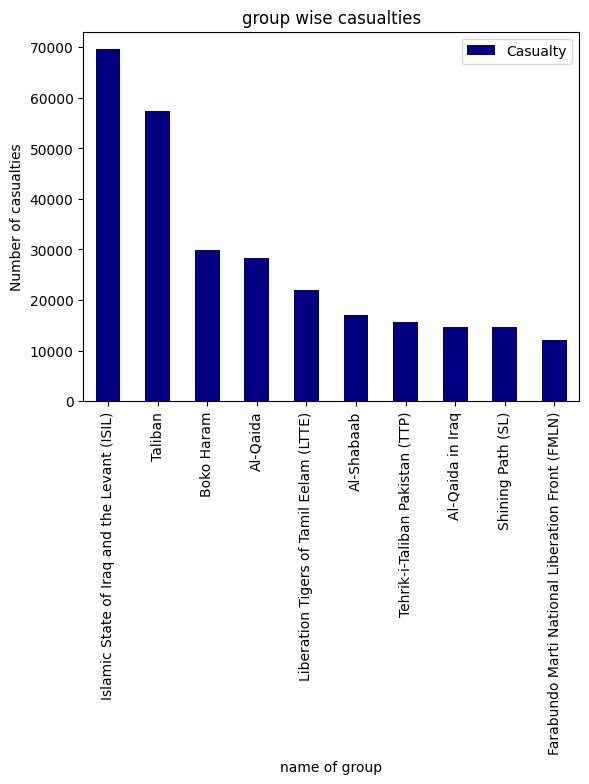

In [53]:
groupCas[:10].plot(kind="bar", color="navy")
plt.title("group wise casualties")
plt.xlabel("name of group")
plt.ylabel("Number of casualties")
plt.show()